In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Preparation and Cleaning

Let’s start by reading the csv file to Pandas DataFrame.

In [2]:
matches=pd.read_csv("C:\\Users\\Preeti\\Downloads\\matches _2008_2020.csv")
matches.head()

,id,Season,City,date,team1,team2,TossWin,TossDecision,result,dl_applied,WinningTeam,win_by_runs,win_by_wickets,Player_of_Match,Venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.shape

(816, 18)

So there are 816 rows and 18 columns. 816 rows imply that there were 816 IPL matches held between 2008 and 2020.

# The dataset has 18 columns. Let’s get acquainted with the columns.

id: The IPL match id.

Season: The IPL season

City: The city where the IPL match was held.

date: The date on which the match was held.

team1: One of the teams of the IPL match

team2: The other team of the IPL match

TossWin: The team that won the toss

TossDecision: The decision taken by the team that won the toss to ‘bat’ or ‘field’

result: The result(‘normal’, ‘tie’, ‘no result’) of the match.

dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

WinningTeam: The winner of the match.

win_by_runs: Provides the runs by which the team batting first won

win_by_runs: Provides the number of wickets by which the team batting second won.

Player_of_Match: The outstanding player of the match.

Venue: The venue where the match was hosted.

umpire1: One of the two on-field umpires who officiate the match.

umpire2: One of the two on-field umpires who officiate the match.

umpire3: The off-field umpire who officiates the match

In [4]:
#checking null values
matches.isnull().sum()

id                   0
Season               0
City                45
date                 0
team1                0
team2                0
TossWin              0
TossDecision         0
result               0
dl_applied           0
WinningTeam          4
win_by_runs          0
win_by_wickets       0
Player_of_Match      4
Venue                0
umpire1              2
umpire2              2
umpire3            697
dtype: int64

It’s imperative to know the count of NaN values for each column before we proceed further.The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number.

In [5]:
matches.describe()

,id,Season,dl_applied,win_by_runs,win_by_wickets
count,816.000000,816.000000,816.000000,816.000000,816.000000
mean,2501.981618,2013.926471,0.023284,13.580882,3.356618
std,4180.302500,3.665054,0.150898,23.604374,3.415810
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,204.750000,2011.000000,0.000000,0.000000,0.000000
50%,408.500000,2014.000000,0.000000,0.000000,3.500000
75%,612.250000,2017.000000,0.000000,19.000000,6.000000
max,11475.000000,2020.000000,1.000000,146.000000,10.000000


In [6]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   Season           816 non-null    int64 
 2   City             771 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    object
 5   team2            816 non-null    object
 6   TossWin          816 non-null    object
 7   TossDecision     816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  WinningTeam      812 non-null    object
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  Player_of_Match  812 non-null    object
 14  Venue            816 non-null    object
 15  umpire1          814 non-null    object
 16  umpire2          814 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#filling null values
matches['City'].fillna('Mumbai', inplace=True)
matches['WinningTeam'].fillna('Draw', inplace=True)
matches['umpire2'].fillna('S Ravi', inplace=True)
matches['umpire1'].fillna('S Ravi', inplace=True)
matches.drop('umpire3',axis=1,inplace=True)
matches['Player_of_Match'].fillna('V Kohli', inplace=True)
matches.isnull().sum()

id                 0
Season             0
City               0
date               0
team1              0
team2              0
TossWin            0
TossDecision       0
result             0
dl_applied         0
WinningTeam        0
win_by_runs        0
win_by_wickets     0
Player_of_Match    0
Venue              0
umpire1            0
umpire2            0
dtype: int64

In [8]:
matches.loc[matches.WinningTeam=='Draw','WinningTeam']


300    Draw
545    Draw
570    Draw
744    Draw
Name: WinningTeam, dtype: object

In [9]:
# matches['Season'].value_counts()
# matches['City'].value_counts()

In [10]:
# Replacing Full names of the teams with their abbreviations 
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Gujarat Titans','Punjab Kings','Lucknow Super Giants']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DCS','SRH','RPS','KTK','PW','GT','PK','LSG'],inplace=True)

# Exploratory Analysis and Visualization


Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.

Let’s begin by importingmatplotlib.pyplot and seaborn.

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (4,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 1.0, 'Toss-Win & Toss-Lose')

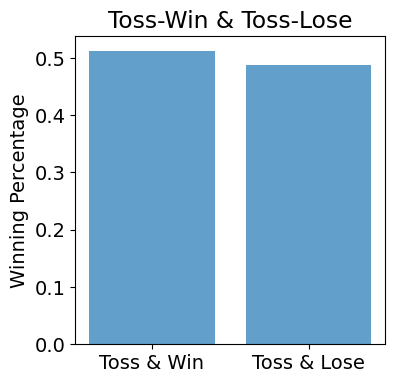

In [12]:
objects = ('Toss & Win','Toss & Lose')
y_pos = np.arange(len(objects))
a=len(matches[matches['TossWin']==matches['WinningTeam']])/len(matches)
b=(len(matches)-(len(matches[matches['TossWin']==matches['WinningTeam']])))/len(matches)
performance = [a,b]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Winning Percentage')
plt.title('Toss-Win & Toss-Lose')

# The team with the most number of wins per season



Let’s analyze the team with the most wins 

In [13]:
# Grouping the data by 'Season' and 'WinningTeam' and counting the number of wins per team per season
team_wins_per_season = matches.groupby(['Season', 'WinningTeam']).size()

# Resetting the index of the resulting Series
team_wins_per_season = team_wins_per_season.reset_index(name='Wins')

# Finding the team with the most wins per season
team_with_most_wins_per_season = team_wins_per_season.groupby('Season')['Wins'].idxmax()
team_with_most_wins_per_season = team_wins_per_season.loc[team_with_most_wins_per_season]
team_with_most_wins_per_season= team_with_most_wins_per_season.reset_index(drop=True)
print(team_with_most_wins_per_season)


    Season WinningTeam  Wins
0     2008          RR    13
1     2009          DD    10
2     2010          MI    11
3     2011         CSK    11
4     2012         KKR    12
5     2013          MI    13
6     2014        KXIP    12
7     2015         CSK    10
8     2016         SRH    11
9     2017          MI    12
10    2018         CSK    11
11    2019          MI    11
12    2020          MI    11


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

In [14]:
# ALTERNATE FOR ABOVE STPE::
# teams_per_season = matches.groupby('Season')['WinningTeam'].value_counts()
# teams_per_season
# year = 2008
# win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
# for items in teams_per_season.iteritems():    
#     if items[0][0]==year:
#         print(items)
#         win_series = pd.DataFrame({
#             'year': [items[0][0]],
#             'team': [items[0][1]],
#             'wins': [items[1]]
#         })
#         win_per_season_df = win_per_season_df.append(win_series)
#         year += 1   

<Axes: xlabel='Wins', ylabel='WinningTeam'>

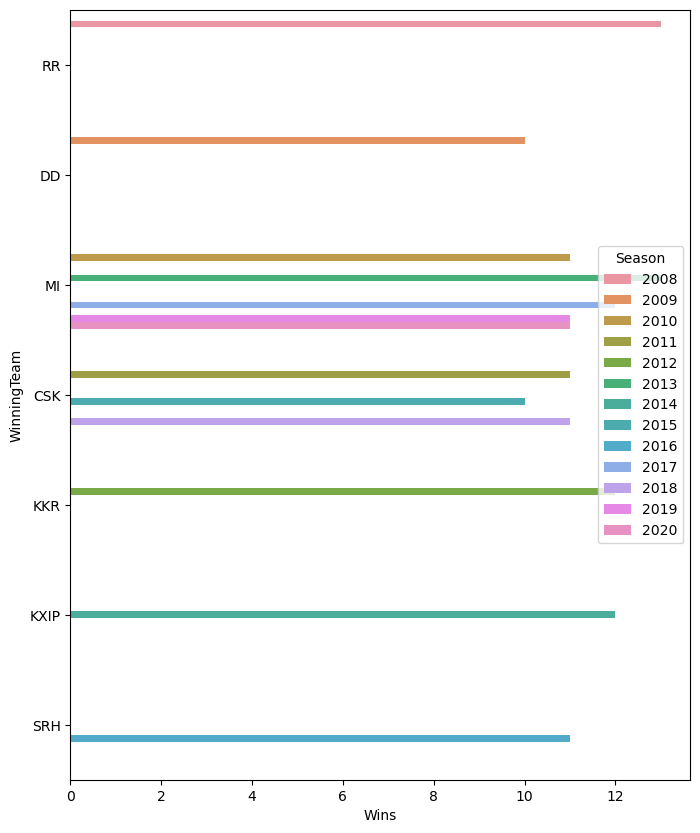

In [15]:
import seaborn as sns
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (8,10)
sns.barplot(x='Wins', y='WinningTeam', hue='Season', data=team_with_most_wins_per_season)

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins). Observations: Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019,2020).

# The venue that hosted the maximum number of matches

In [16]:
venue_ser = matches['Venue'].value_counts()

In [17]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)
print(venue_df)

                                                venue matches
0                                        Eden Gardens      77
1                               M Chinnaswamy Stadium      73
2                                    Wankhede Stadium      73
3                                    Feroz Shah Kotla      67
4           Rajiv Gandhi International Stadium, Uppal      56
5                     MA Chidambaram Stadium, Chepauk      49
6                              Sawai Mansingh Stadium      47
7          Punjab Cricket Association Stadium, Mohali      35
8                 Dubai International Cricket Stadium      34
9                                Sheikh Zayed Stadium      28
10            Maharashtra Cricket Association Stadium      21
11                            Sharjah Cricket Stadium      18
12                         Dr DY Patil Sports Academy      17
13                         Subrata Roy Sahara Stadium      17
14                                          Kingsmead      15
15  Punj

41

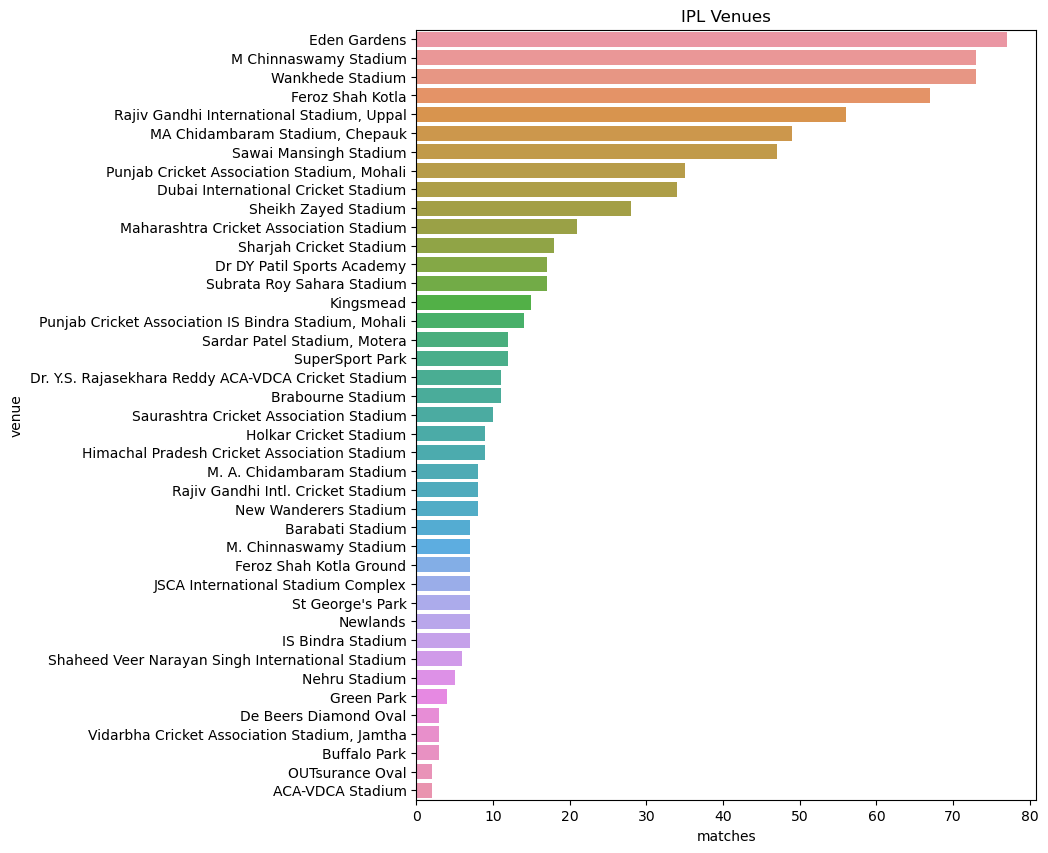

In [18]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);
matches['Venue'].nunique()

# Observations:

Eden Gardens has hosted the maximum number of IPL matches followed by M Chinnaswamy Stadium and Wankhede Stadium.

Till 2020, IPL matches were hosted by 41 venues

# The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.

In [19]:
team_wins_ser = matches['WinningTeam'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [20]:
team_wins_df 

,team,wins
0,MI,120
1,CSK,106
2,KKR,99
3,RCB,91
4,KXIP,88
5,RR,81
6,DD,67
7,SRH,66
8,DC,29
9,DCS,19


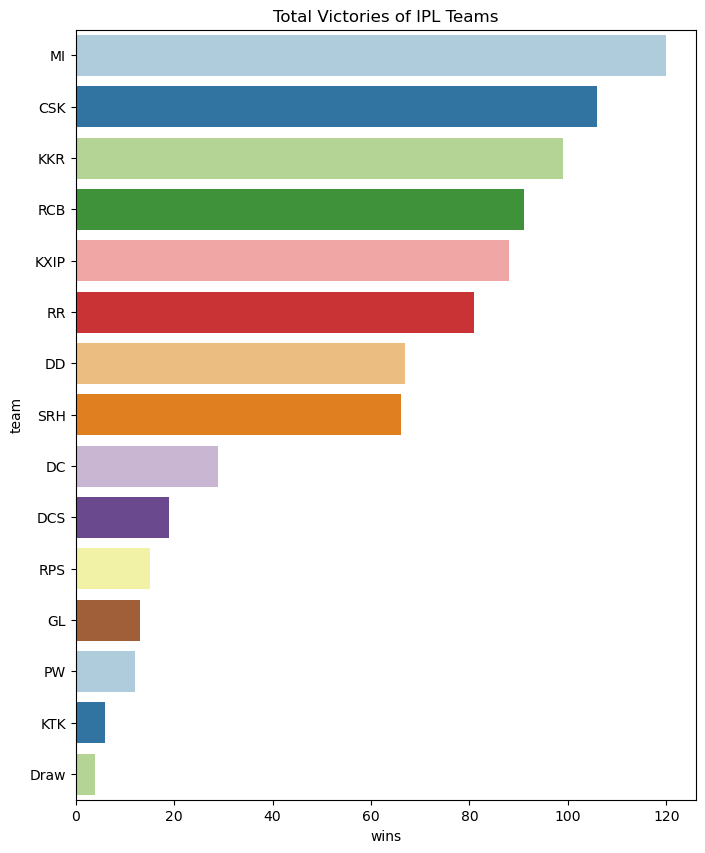

In [21]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

# Observation: 

Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -120) followed by Chennai Super Kings and Kolkata Knight Riders.

# Most Valuable Player


Winning matters the most in a competitive league match.

If a player makes the most significant contribution to his team’s victory, then he’s chosen as the Player_of_Match.

The player who has won the Player_of_Match title on most occasions is the most valuable player.

In [22]:
mvp = matches['Player_of_Match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  

In [23]:
mvp_ten_df

,player,wins
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
5,V Kohli,17
6,YK Pathan,16
7,SR Watson,16
8,SK Raina,14
9,G Gambhir,13


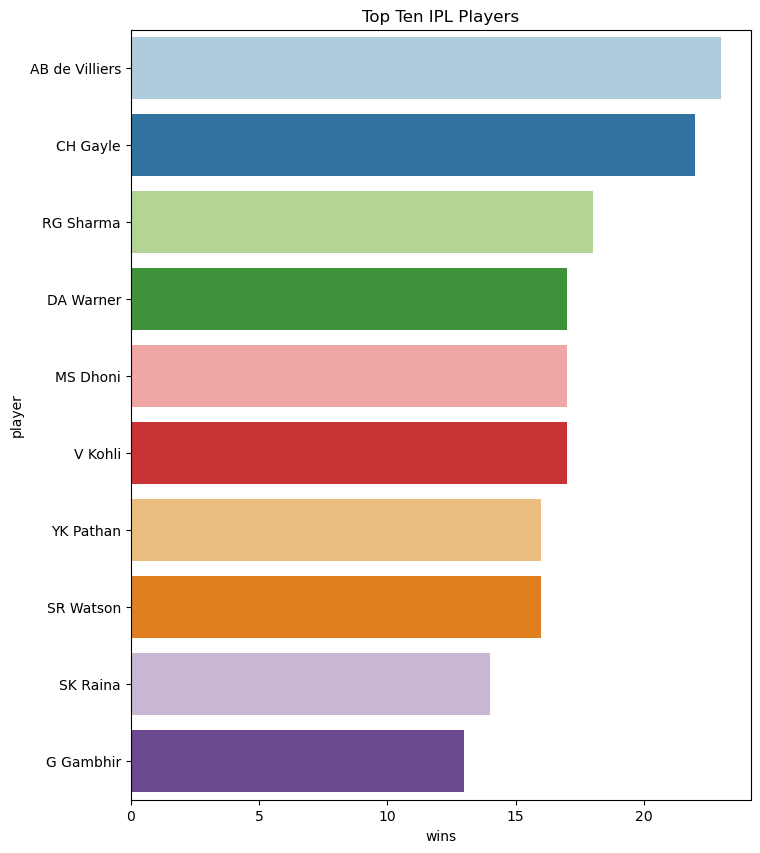

In [24]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

# Observations:

AB de Villiers is the player who won the most player of the match awards and hence is the most valuable player.

Six Indian players have figured in the top ten IPL players list

# The team that won the most number of toss

In [25]:
toss = matches['TossWin'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

In [26]:
toss_df

,team,wins
0,MI,106
1,KKR,98
2,CSK,97
3,RCB,87
4,RR,87
5,KXIP,85
6,DD,80
7,SRH,57
8,DC,43
9,PW,20


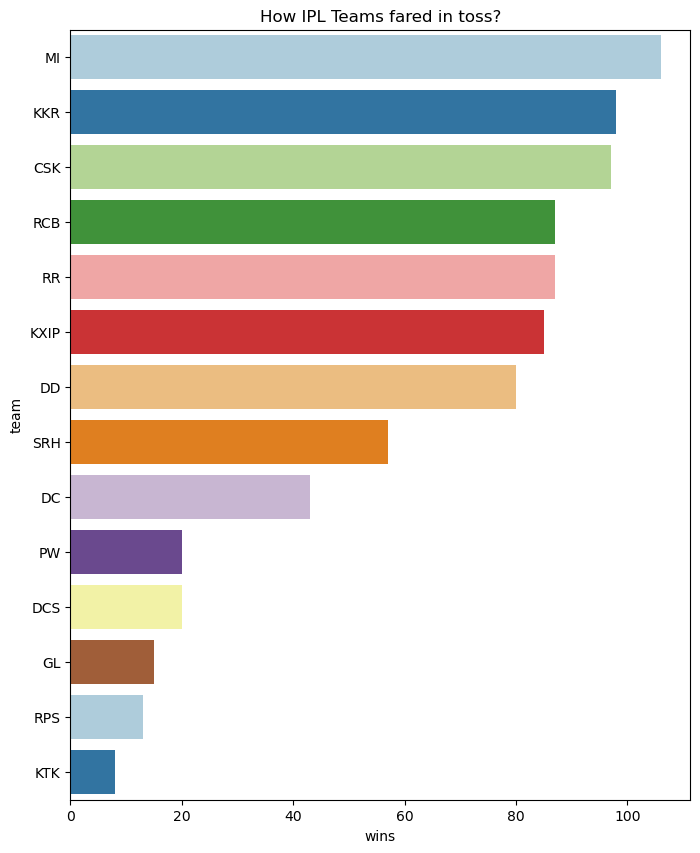

In [27]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

# Observations:

Mumbai Indians has won the most toss(till 2020) in IPL history.

All the top teams in IPL are successful in winning the toss as well.

In [28]:
#Finding Co-relations among attributes
corrMatrix=matches.corr()
corrMatrix

,id,Season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.753073,-0.035524,-0.002980,-0.005605
Season,0.753073,1.000000,-0.021305,-0.010824,-0.004960
dl_applied,-0.035524,-0.021305,1.000000,-0.017581,-0.011369
win_by_runs,-0.002980,-0.010824,-0.017581,1.000000,-0.566078
win_by_wickets,-0.005605,-0.004960,-0.011369,-0.566078,1.000000


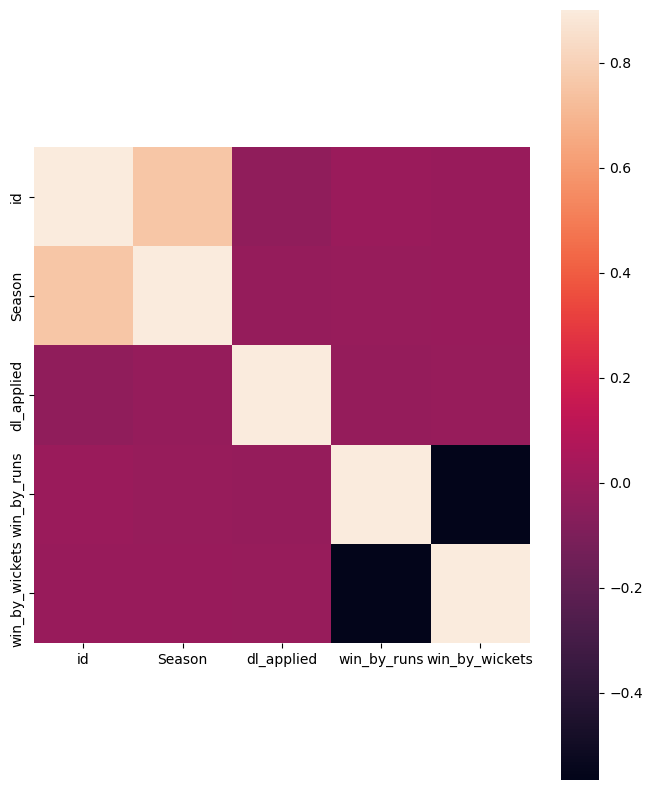

In [29]:
sns.heatmap(corrMatrix, vmax = .9, square = True)
plt.show()

In [30]:
#Checking for null values
matches.isnull().sum()
# matches.apply(lambda x: sum(x.isnull()),axis=0)


id                 0
Season             0
City               0
date               0
team1              0
team2              0
TossWin            0
TossDecision       0
result             0
dl_applied         0
WinningTeam        0
win_by_runs        0
win_by_wickets     0
Player_of_Match    0
Venue              0
umpire1            0
umpire2            0
dtype: int64

In [31]:
matches.replace(['Bangalore','Chandigarh','Delhi','Mumbai','Kolkata','Jaipur','Hyderabad','Chennai','Cape Town',
                 'Port Elizabeth','Durban','Centurion','East London','Johannesburg','Kimberley','Bloemfontein','Ahmedabad',
                 'Cuttack','Nagpur','Dharamsala','Kochi','Indore','Visakhapatnam','Pune','Raipur','Ranchi','Abu Dhabi','Sharjah',
                 'Dubai','Rajkot','Kanpur','Mohali','Bengaluru'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
                                                                  , 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],inplace=True)

In [32]:
matches.drop(columns=['umpire1','umpire2'],axis=1, inplace =True)


In [33]:
matches.drop(columns=['Player_of_Match'], inplace =True)


In [34]:
matches.head()

,id,Season,City,date,team1,team2,TossWin,TossDecision,result,dl_applied,WinningTeam,win_by_runs,win_by_wickets,Venue
0,1,2017,7,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,24,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,Maharashtra Cricket Association Stadium
2,3,2017,30,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,Saurashtra Cricket Association Stadium
3,4,2017,22,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,Holkar Cricket Stadium
4,5,2017,1,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,M Chinnaswamy Stadium


In [35]:
matches.isnull().sum()

id                0
Season            0
City              0
date              0
team1             0
team2             0
TossWin           0
TossDecision      0
result            0
dl_applied        0
WinningTeam       0
win_by_runs       0
win_by_wickets    0
Venue             0
dtype: int64

In [36]:
matches = matches[['team1','team2','City','TossDecision','TossWin','Venue','WinningTeam']]
matches.head()

,team1,team2,City,TossDecision,TossWin,Venue,WinningTeam
0,SRH,RCB,7,field,RCB,"Rajiv Gandhi International Stadium, Uppal",SRH
1,MI,RPS,24,field,RPS,Maharashtra Cricket Association Stadium,RPS
2,GL,KKR,30,field,KKR,Saurashtra Cricket Association Stadium,KKR
3,RPS,KXIP,22,field,KXIP,Holkar Cricket Stadium,KXIP
4,RCB,DD,1,bat,RCB,M Chinnaswamy Stadium,RCB


In [37]:
print(matches['team1'].unique())
print(matches['team2'].unique())

['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'DCS']
['RCB' 'RPS' 'KKR' 'KXIP' 'DD' 'SRH' 'MI' 'GL' 'RR' 'CSK' 'DC' 'PW' 'KTK'
 'DCS']


In [38]:
# print(matches[['team1', 'team2', 'TossWin']].dtypes)


In [39]:
# print(matches['team1'].isnull().sum())
# print(matches['team2'].isnull().sum())

In [40]:
matches["WinningTeam"] = np.where(matches["WinningTeam"] == matches["team1"], 1, 0)
matches.head()

,team1,team2,City,TossDecision,TossWin,Venue,WinningTeam
0,SRH,RCB,7,field,RCB,"Rajiv Gandhi International Stadium, Uppal",1
1,MI,RPS,24,field,RPS,Maharashtra Cricket Association Stadium,0
2,GL,KKR,30,field,KKR,Saurashtra Cricket Association Stadium,0
3,RPS,KXIP,22,field,KXIP,Holkar Cricket Stadium,0
4,RCB,DD,1,bat,RCB,M Chinnaswamy Stadium,1


In [41]:
matches['TossDecision'] = matches['TossDecision'].map({'field':0,'bat':1})
matches.head(2)

,team1,team2,City,TossDecision,TossWin,Venue,WinningTeam
0,SRH,RCB,7,0,RCB,"Rajiv Gandhi International Stadium, Uppal",1
1,MI,RPS,24,0,RPS,Maharashtra Cricket Association Stadium,0


In [42]:
matches['team1'] = matches['team1'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7,'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12,'DCS':13,'GT':14,'PK':15,'LSG':16})
matches['team2'] = matches['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7, 'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12,'DCS':13,'GT':14,'PK':15,'LSG':16})
matches['TossWin'] = matches['TossWin'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7, 'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12,'DCS':13,'GT':14,'PK':15,'LSG':16})

matches.head(10)

,team1,team2,City,TossDecision,TossWin,Venue,WinningTeam
0,7,1,7,0,1,"Rajiv Gandhi International Stadium, Uppal",1
1,3,10,24,0,10,Maharashtra Cricket Association Stadium,0
2,9,4,30,0,4,Saurashtra Cricket Association Stadium,0
3,10,6,22,0,6,Holkar Cricket Stadium,0
4,1,8,1,1,1,M Chinnaswamy Stadium,1
5,9,7,7,0,7,"Rajiv Gandhi International Stadium, Uppal",0
6,4,3,4,0,3,Wankhede Stadium,0
7,1,6,22,1,1,Holkar Cricket Stadium,0
8,8,10,24,0,10,Maharashtra Cricket Association Stadium,1
9,7,3,4,0,3,Wankhede Stadium,0


In [43]:
matches.drop(columns=['Venue'], inplace =True)
matches.head(2)

,team1,team2,City,TossDecision,TossWin,WinningTeam
0,7,1,7,0,1,1
1,3,10,24,0,10,0


In [44]:
matches.describe()

,team1,team2,City,TossDecision,TossWin,WinningTeam
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,4.525735,4.699755,9.528186,0.392157,4.558824,0.447304
std,3.233540,3.268260,9.002069,0.488531,3.269712,0.497520
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4.000000,0.000000,2.000000,0.000000
50%,4.000000,4.000000,5.000000,0.000000,4.000000,0.000000
75%,7.000000,7.000000,12.000000,1.000000,7.000000,1.000000
max,13.000000,13.000000,33.000000,1.000000,13.000000,1.000000


In [45]:
# data for training purpose

x=matches[['team1', 'team2', 'City']]
y=matches[['WinningTeam']]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.2,random_state=49)

# Testing Data 

In [103]:
# for testing the data
matches_testdata= pd.read_csv("C:\\Users\\Preeti\\Downloads\\Matces_testdata.csv")
matches_testdata.head()   

,id,Season,City,date,team1,team2,TossWin,TossDecision,result,dl_applied,win_by_runs,win_by_wickets,Player_of_Match,Venue,umpire1,umpire2,umpire3
0,1,2021,Dubai,12-07-2019,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,27,0,F du Plessis,Dubai International Cricket Stadium,Nitin Menon,RK Illingworth,NaN
1,2,2021,Sharjah,13-07-2019,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,3,VR Iyer,Sharjah Cricket Stadium,KN Ananthapadmanabhan,MA Gough,NaN
2,3,2021,Sharjah,14-07-2019,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,normal,0,0,4,SP Narine,Sharjah Cricket Stadium,CB Gaffaney,VK Sharma,NaN
3,4,2021,Dubai,15-07-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,0,3,RD Gaikwad,Dubai International Cricket Stadium,Nitin Menon,RK Illingworth,NaN
4,5,2021,Dubai,16-07-2019,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,0,7,KS Bharat,Dubai International Cricket Stadium,KN Ananthapadmanabhan,Nitin Menon,NaN


In [104]:
testdata = matches_testdata.copy()
# testdata.iloc[18, 4]
# testdata[testdata['team2']=='Kolkata Knight Riders']


In [105]:

testdata.replace(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Punjab Kings']
                ,['CSK','DC','RCB','MI','KKR','SRH','RR','PK'],inplace=True)
# testdata['team1']
# testdata['team2']
# testdata['team1'].nunique()

In [106]:
testdata.isnull().sum()

id                  0
Season              0
City                0
date                0
team1               0
team2               0
TossWin             0
TossDecision        0
result              0
dl_applied          0
win_by_runs         0
win_by_wickets      0
Player_of_Match     0
Venue               0
umpire1             0
umpire2             0
umpire3            60
dtype: int64

In [107]:
testdata.drop(['id','Season','date','TossWin','TossDecision','result','Player_of_Match','Venue','umpire1','umpire2','umpire3','win_by_runs','win_by_wickets','dl_applied'],axis=1,inplace=True)


In [108]:
test_copy = matches_testdata.copy()

In [109]:
testdata.replace(['Dubai', 'Sharjah', 'Abu Dhabi', 'Ahmedabad', 'Delhi', 'Chennai',
       'Mumbai'],[1, 2, 3, 4, 5, 6, 7],inplace=True)


testdata['team1'] = testdata['team1'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'PK':6, 'SRH':7})
testdata['team2'] = testdata['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'PK':6, 'SRH':7})
testdata.head()

,City,team1,team2
0,1,0,4
1,2,2,4
2,2,1,4
3,1,2,0
4,1,2,1


# Trainig Models

1.LOGISTIC REGRESSION:-

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x,y)
pred=model1.predict(x)
model1.score(x,y)

0.5612745098039216

In [111]:
model1.fit(train_x, train_y)# for logistic regression model
# cheking training accuracy
y_pred = model1.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
print(model1.score(train_x, train_y))
accuracy

0.553680981595092


0.553680981595092

In [112]:
# cheking initial test accuracy # for logistic regression model
y_pred = model1.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy
print(model1.score(test_x,test_y))
accuracy

0.5609756097560976


0.5609756097560976

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        92
           1       0.50      0.21      0.29        72

    accuracy                           0.56       164
   macro avg       0.54      0.52      0.49       164
weighted avg       0.54      0.56      0.51       164

0.5226449275362318


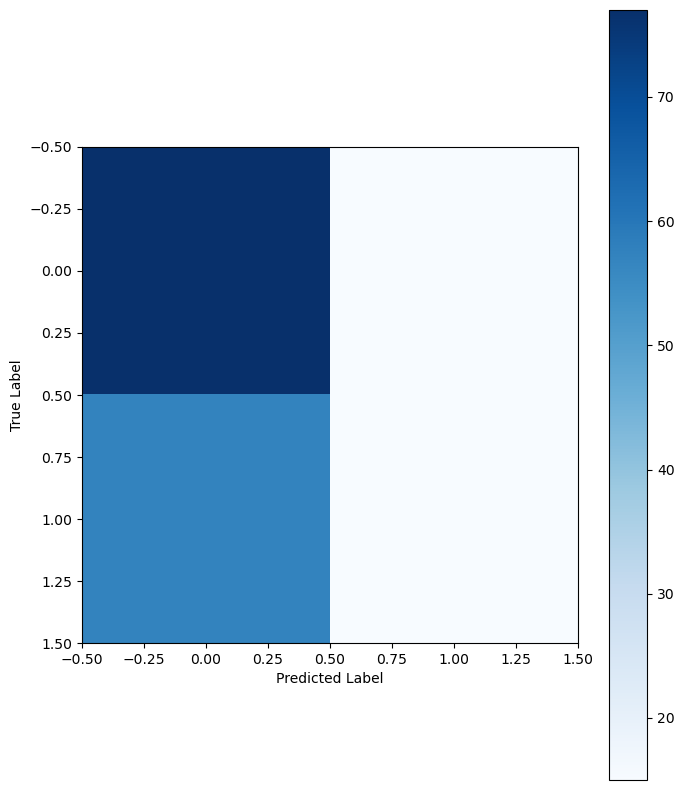

In [113]:
from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report
predictions = [round(value) for value in y_pred]
auc_logis = roc_auc_score(test_y, predictions)
print(classification_report(test_y,predictions))# for logistic regression model
print(auc_logis)
cm=confusion_matrix(test_y,predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.show()


2.XGBOOST REGRESSOR MODEL:-

In [114]:
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
# from sklearn.metrics import classification_report

In [115]:
# for XGBoost model
xgb=xgb.XGBRegressor()
xgb.fit(train_x,train_y)
pred_yxgb=xgb.predict(test_x)
print(xgb.score(train_x,train_y))
model1.score(train_x,train_y)

0.6499470038899121


0.553680981595092

In [116]:
# cheking initial test accuracy # for XGBoost model
y_pred = xgb.predict(test_x)
predictions = [round(value) for value in pred_yxgb]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.4878048780487805

In [117]:
# for XGBoost model
predictions = [round(value) for value in y_pred]
auc_xgb = roc_auc_score(test_y, predictions)
print(classification_report(test_y,predictions))
auc_xgb

              precision    recall  f1-score   support

           0       0.56      0.41      0.47        92
           1       0.44      0.58      0.50        72

    accuracy                           0.49       164
   macro avg       0.50      0.50      0.49       164
weighted avg       0.51      0.49      0.49       164



0.4981884057971015

3.K-Fold cross validation

In [118]:
# from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.svm import SVC

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [120]:
# model=xgb.XGBRegressor()
# outcome_var= train_y
# predictor_var = train_x
# df=[train_x, train_y]
# model = LogisticRegression()
# classification_model(model, df,predictor_var,outcome_var)

3.SVM MODEL:-

In [121]:
#SVM
svm=SVC()
svm.fit(train_x,train_y)
svm.score(test_x,test_y)
y_pred = svm.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_svc = roc_auc_score(test_y, predictions)
#print(confusion_matrix(test_x,y_pred))
print(classification_report(test_y,y_pred))
print("Accuracy of SVM classifier on train set:", svm.score(train_x,train_y))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(test_x,test_y)*100))
auc_svc

              precision    recall  f1-score   support

           0       0.58      0.87      0.70        92
           1       0.54      0.19      0.29        72

    accuracy                           0.57       164
   macro avg       0.56      0.53      0.49       164
weighted avg       0.56      0.57      0.52       164

Accuracy of SVM classifier on train set: 0.5996932515337423
Accuracy of SVM classifier on test set: 57.3171


0.5320048309178743

4.DECISION TREE CLASSIFIER:-

In [122]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(train_x,train_y)
dtree.score(test_x,test_y)
y_pred = dtree.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_dtree = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of Decision Tree classifier on train set:", dtree.score(train_x,train_y))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(test_x,test_y)*100))
auc_dtree

[[49 43]
 [41 31]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        92
           1       0.42      0.43      0.42        72

    accuracy                           0.49       164
   macro avg       0.48      0.48      0.48       164
weighted avg       0.49      0.49      0.49       164

Accuracy of Decision Tree classifier on train set: 0.8619631901840491
Accuracy of decision tree classifier on test set: 48.7805


0.4815821256038647

5.RANDOM FOREST CLASSIFIER:-

In [123]:
#Random Forest Classifier
clrf=RandomForestClassifier(n_estimators=100)
clrf.fit(train_x,train_y)
clrf.score(test_x,test_y)
y_pred = clrf.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_clrf = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of Random Forest classifier on train set:", clrf.score(train_x,train_y))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(clrf.score(test_x,test_y)*100))
auc_clrf

[[44 48]
 [37 35]]
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        92
           1       0.42      0.49      0.45        72

    accuracy                           0.48       164
   macro avg       0.48      0.48      0.48       164
weighted avg       0.49      0.48      0.48       164

Accuracy of Random Forest classifier on train set: 0.8619631901840491
Accuracy of Random Forest classifier on test set: 48.1707


0.4821859903381643

6.XGB CLASSIFIER:-

In [124]:
#XGB Classifier
xgbcl=XGBClassifier()
xgbcl.fit(train_x,train_y)
xgbcl.score(test_x,test_y)
y_pred = xgbcl.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_xgbcl = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of XBB classifier on train set:", xgbcl.score(train_x,train_y))
print('Accuracy of XGB classifier on test set: {:.4f}'.format(xgbcl.score(test_x,test_y)*100))
auc_xgbcl

[[42 50]
 [37 35]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        92
           1       0.41      0.49      0.45        72

    accuracy                           0.47       164
   macro avg       0.47      0.47      0.47       164
weighted avg       0.48      0.47      0.47       164

Accuracy of XBB classifier on train set: 0.8404907975460123
Accuracy of XGB classifier on test set: 46.9512


0.471316425120773

Let's do some hyperparameter tuning and see if we can increase our accuracy more.

Hyperparameters of Random forest classifier: bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False

Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [125]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']}

In [126]:
grid_search = GridSearchCV(estimator=clrf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)


In [127]:
# grid_search.fit(train_x,train_y)

In [128]:
#let's see the best parameters as per our grid search
# G=grid_search.best_params_
# print(G)

In [129]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 10,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 500,random_state=6)


In [130]:
rand_clf.fit(train_x,train_y)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=5, n_estimators=500, random_state=6)

In [131]:
#let's see the best parameters as per our grid search
# grid_search = GridSearchCV(rand_clf, grid_param, cv=5)
# grid_search.fit(train_x, train_y)

# print(grid_search.best_params_)

In [132]:
rand_clf.score(test_x,test_y)


0.49390243902439024

In [133]:
# testdata[testdata['team2']=='KKR']


In [134]:
# For data from 2020 IPL
pred = rand_clf.predict(testdata)
# print(pred)
testdata = testdata.replace([0,1,2,3,4,5,6,7], ['CSK', 'RCB', 'DC', 'MI', 'KKR', 'RR', 'KXIP', 'SRH'])#{0:'CSK', 1:'RCB', 2:'DC', 3:'MI',4: 'KKR', 5:'RR', 6:'KXIP', 7:'SRH'})
#testdata['team2'] = testdata['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7})
winner = []
for i in range(len(pred)):
    if pred[i] == 0:
        winner.append(testdata['team1'][i])
        
    else:  
        winner.append(testdata['team2'][i])
    

In [135]:
winner

['CSK',
 'DC',
 'RCB',
 'DC',
 'RCB',
 'MI',
 'KKR',
 'CSK',
 'RCB',
 'RR',
 'CSK',
 'RCB',
 'SRH',
 'MI',
 'CSK',
 'KKR',
 'SRH',
 'RCB',
 'KXIP',
 'DC',
 'RR',
 'CSK',
 'RCB',
 'DC',
 'KXIP',
 'RCB',
 'MI',
 'DC',
 'RR',
 'RCB',
 'CSK',
 'DC',
 'RR',
 'CSK',
 'RCB',
 'DC',
 'RR',
 'CSK',
 'RCB',
 'KXIP',
 'DC',
 'RCB',
 'KKR',
 'MI',
 'RCB',
 'CSK',
 'KXIP',
 'DC',
 'CSK',
 'DC',
 'RCB',
 'MI',
 'CSK',
 'DC',
 'RCB',
 'MI',
 'KXIP',
 'KKR',
 'DC',
 'RCB']

In [136]:
winner = list()
for i in range(len(pred)):
    if pred[i] == 0:
        winner.append(testdata['team1'][i])
        
    else:
        winner.append(testdata['team2'][i])

F_Winner=[]
for i in winner:
    if i==0:
        print('CSK')
    elif i==1:
        print('RCB')
    elif i==2:
        print('DC')
    elif i==3:
        print('MI')
    elif i==4:
        print('KKR')
    elif i==5:
        print('RR')
    elif i==6:
        print('KXIP') 
    elif i==7:
        print('SRH')

In [137]:
final_submission = {"id":matches_testdata.id.tolist(), 
              "winner":winner}
submit = pd.DataFrame(final_submission)


In [138]:
# Converting the output to CSV file
submit.to_csv("submit.csv", index=False)

In [145]:
# import os
# print(os.getcwd())

# DELIVERIES DATASET

In [160]:
deliveries=pd.read_csv("C:\\Users\\Preeti\\Downloads\\deliveries.csv")

# Data pre-processing

In [161]:
deliveries.drop(["over","ball","non_striker","is_super_over","wide_runs","bye_runs",
                 "legbye_runs","noball_runs","penalty_runs","extra_runs",
                 "total_runs","dismissal_kind"],axis = 1,inplace = True)

In [162]:
deliveries["player_dismissed"] = deliveries["player_dismissed"].fillna(0)
deliveries["player_dismissed"] = np.where(deliveries["player_dismissed"] == 0 ,0,1)
deliveries["catch"] = deliveries["fielder"]
deliveries["catch"] = deliveries["catch"].fillna(0)
deliveries["catch"] = np.where(deliveries["catch"] == 0 ,0,1)

In [163]:
deliveries["batsman_extra_score"] = deliveries["batsman_runs"]
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(1,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(2,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(3,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(5,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(4,1)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(6,2)

In [164]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,batsman,bowler,batsman_runs,player_dismissed,fielder,catch,batsman_extra_score
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,4,0,NaN,0,1
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0


In [165]:
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DD','SRH','RPS','RPS','KTK','PW'],inplace=True)


In [166]:
batsman = deliveries.batsman.unique()
batsman.sort()
bowler = deliveries.bowler.unique()
bowler.sort()

corrected_batsman = []
for b in batsman:
    new = b[0]
    for i in range(len(b)):
        if b[i] == " ":
            new = new + b[i:]
    corrected_batsman.append(new)

corrected_bowler = []
for b in bowler:
    new = b[0]
    for i in range(len(b)):
        if b[i] == " ":
            new = new + b[i:]
    corrected_bowler.append(new)
    
for i in range(len(batsman)):
    deliveries["batsman"] = deliveries["batsman"].replace(batsman[i],corrected_batsman[i])

for i in range(len(bowler)):
    deliveries["bowler"] = deliveries["bowler"].replace(bowler[i],corrected_bowler[i])

# Defining function for calculating player_value

In [167]:
def Player_value(player,match):
    df_1 = deliveries.query("match_id == '%s'"%match).query("batsman == '%s'"%player)
    score = sum(df_1["batsman_runs"])
    if score == 0:
        score += -2
    if score >= 50 and score < 100:
        score += 8
    if score >= 100:
        score += 16
    score += sum(df_1["batsman_extra_score"])
    
    df_2 = deliveries.query("match_id == '%s'"%match).query("bowler == '%s'"%player)
    if sum(df_2["player_dismissed"]) == 4:
        score += 8
    if sum(df_2["player_dismissed"]) >= 5:
        score += 16
    score += sum(df_2["player_dismissed"])*25
    
    df_3 = deliveries.query("match_id == '%s'"%match).query("fielder == '%s'"%player)
    score += sum(df_3["catch"])*8
    
    if df_1.shape[0] == 0 and df_2.shape[0] == 0 and df_3.shape[0] == 0:
        return 0
    
    return score

# Creating Dataset for teams' scores

In [168]:
match_id = deliveries.match_id.unique()

Scores = pd.DataFrame(columns = ["id","team1_bats_score","team1_bowl_score","team2_bats_score","team2_bowl_score"])

for i in match_id:
    bowler_1 = deliveries.query("match_id == '%s'"%i).query("inning == 2").bowler.unique()
    bowler_2 = deliveries.query("match_id == '%s'"%i).query("inning == 1").bowler.unique()
    bats_1 = deliveries.query("match_id == '%s'"%i).query("inning == 1").batsman.unique()
    bats_2 = deliveries.query("match_id == '%s'"%i).query("inning == 2").batsman.unique()
    
    team1_bowl_score = 0
    team2_bowl_score = 0
    team1_bats_score = 0
    team2_bats_score = 0
    
    for p in bowler_1:
        team1_bowl_score += Player_value(p,i)
        
    for p in bowler_2:
        team2_bowl_score += Player_value(p,i)
    
    for p in bats_1:
        team1_bats_score += Player_value(p,i)
        
    for p in bats_2:
        team2_bats_score += Player_value(p,i)
        
    Scores = Scores.append({"id":i,"team1_bats_score":team1_bats_score,
                            "team1_bowl_score":team1_bowl_score,
                            "team2_bats_score":team2_bats_score,
                            "team2_bowl_score":team2_bowl_score},  ignore_index = True)
    

In [169]:
Scores.head(2)


,id,team1_bats_score,team1_bowl_score,team2_bats_score,team2_bowl_score
0,1,0,0,0,0
1,2,0,0,0,0
